In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../")

%matplotlib notebook
import matplotlib.pylab as plt
# pylab.rcParams['figure.figsize'] = (10, 5)

In [2]:
from ld_gan import visualize
import numpy as np

<IPython.core.display.Javascript object>


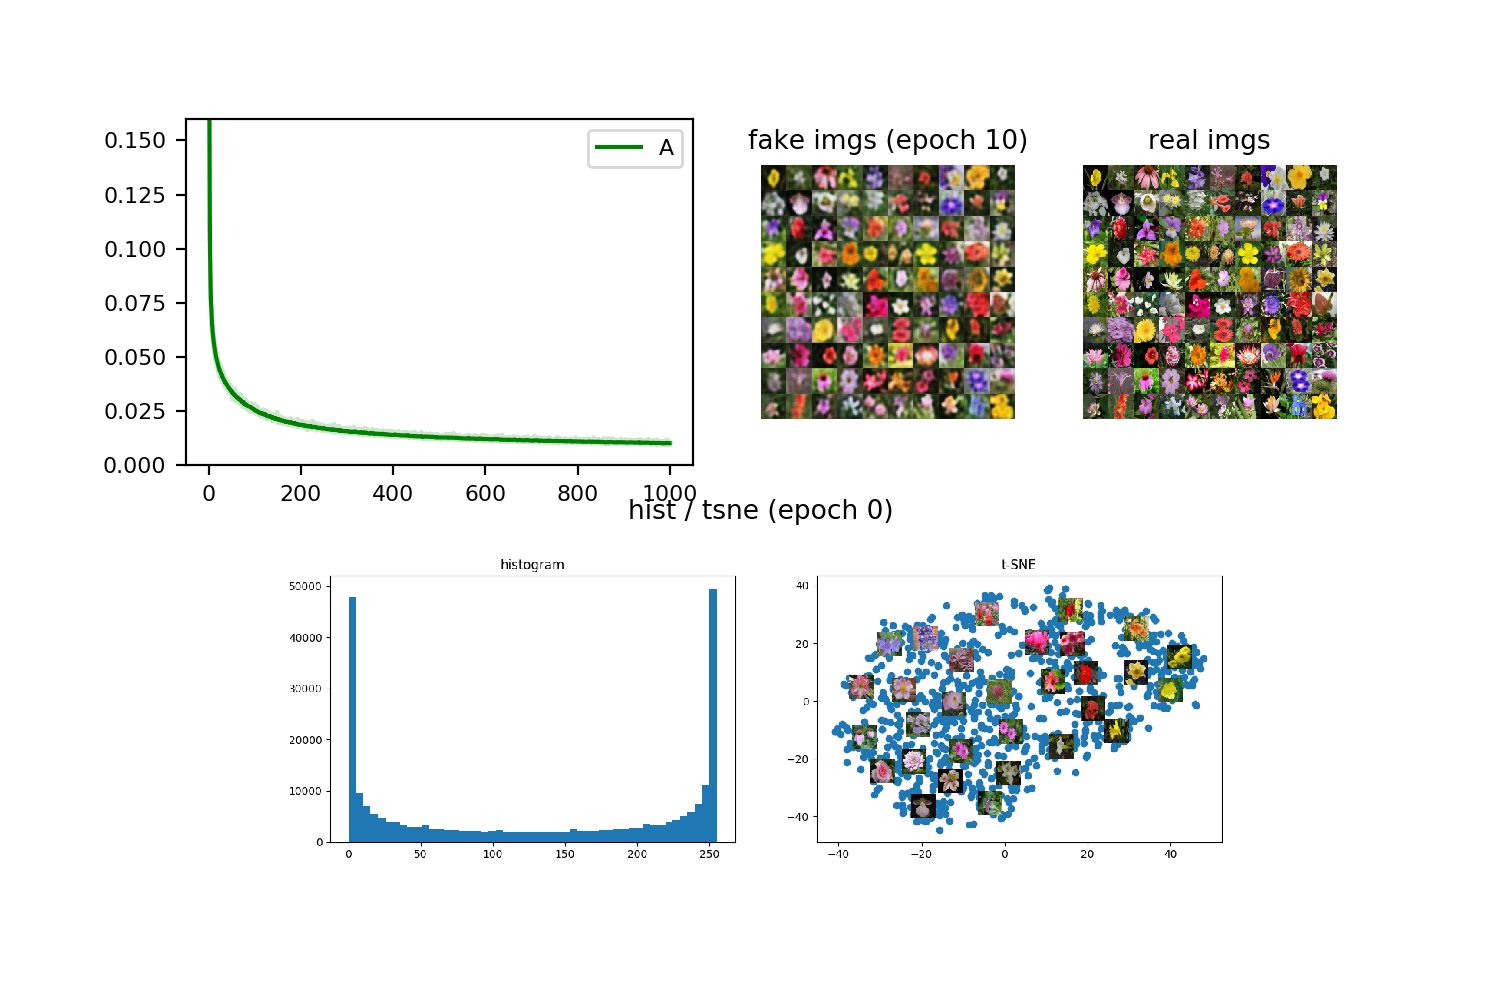

In [3]:
visualize.learning_curve_ia(
                            "xf_enc.py", 
                            high_res=True,
                            show_hist_tsne=True
                            )

<IPython.core.display.Javascript object>


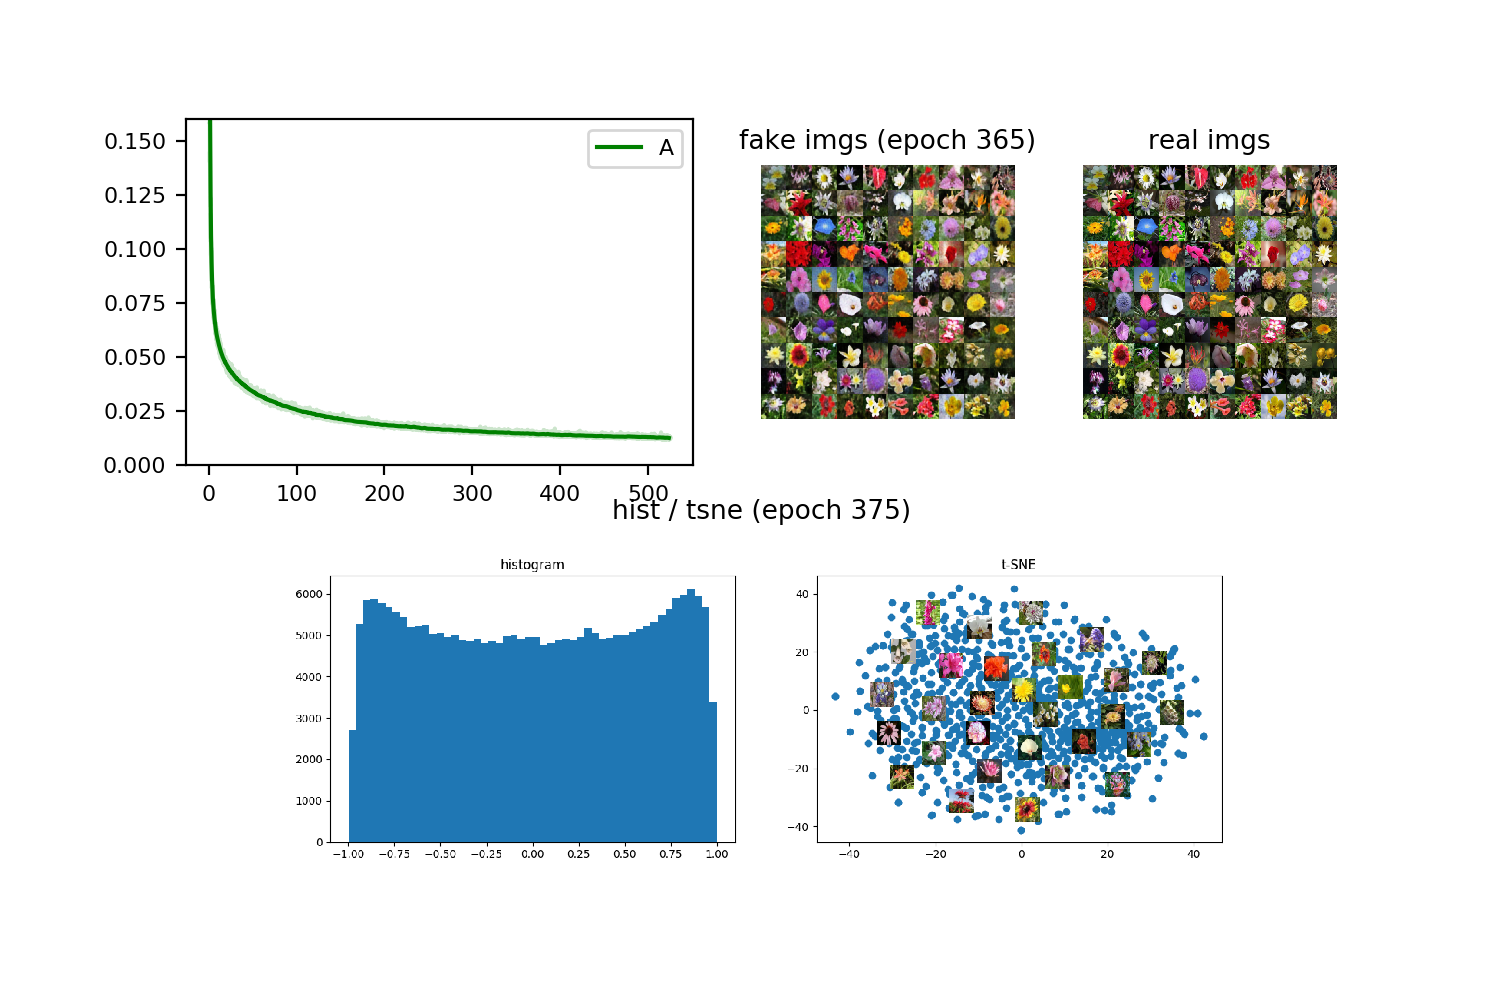

In [6]:
visualize.learning_curve_ia(
                            "xf_enc_v2.py", 
                            high_res=True,
                            show_hist_tsne=True
                            )

In [7]:
import ld_gan

In [10]:
X, Y = ld_gan.data_proc.data_loader.load_data(1, verbose=1, resize = 64)

100%|██████████| 102/102 [00:17<00:00,  7.46it/s]

load data from '/export/home/oblum/projects/ls_gan/data/flowers_102/jpg_128'


In [14]:
enc = ld_gan.utils.model_handler.load_model("xf_enc.py", 500, "enc")
gen = ld_gan.utils.model_handler.load_model("xf_enc.py", 500, "gen")

loaded model 'projects/xf_enc.py/model/e_0500.pth'
loaded model 'projects/xf_enc.py/model/g_0500.pth'


In [15]:
z = ld_gan.utils.model_handler.apply_model(enc, X[:100])
x = ld_gan.utils.model_handler.apply_model(gen, z)

<IPython.core.display.Javascript object>


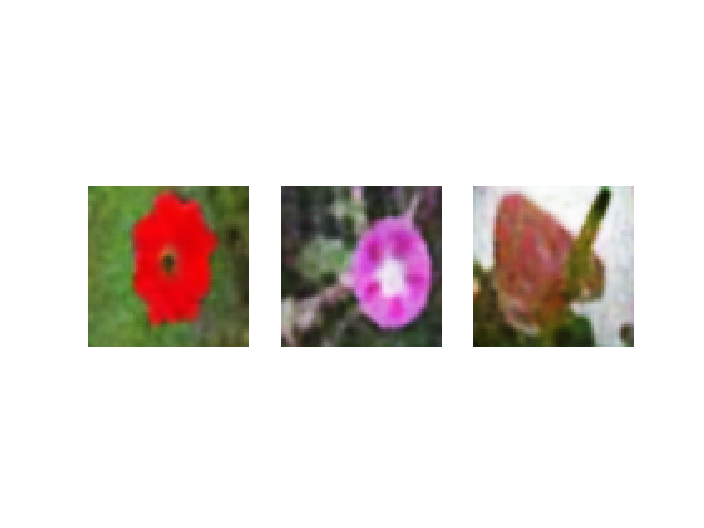

In [18]:
visualize.disp(x[32:35])